In [53]:
from joblib import load
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
grid = load('../models/rf_random_search_50_model.joblib')

In [41]:
results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,12.723578,0.433392,0.128777,0.004237,700,2,2,sqrt,95,True,...,0.433333,0.833333,0.816667,0.550000,0.850000,0.600000,0.900000,0.673889,0.167904,20
1,48.732330,2.003605,0.288692,0.007773,1650,2,2,sqrt,65,False,...,0.400000,0.866667,0.783333,0.533333,0.850000,0.550000,0.933333,0.665000,0.183872,40
2,9.999763,0.293695,0.205571,0.005530,1150,2,2,log2,45,False,...,0.422222,0.850000,0.866667,0.500000,0.850000,0.566667,0.916667,0.673889,0.182355,19
3,1715.685836,287.016389,0.239055,0.004401,1400,2,1,None,35,False,...,0.411111,0.816667,0.750000,0.483333,0.866667,0.350000,0.733333,0.620000,0.172655,46
4,12.304313,0.499953,0.081419,0.002618,450,5,4,sqrt,35,False,...,0.500000,0.850000,0.733333,0.550000,0.850000,0.550000,0.950000,0.673889,0.164880,20


In [46]:
top10 = results.sort_values('rank_test_score', ascending=True)

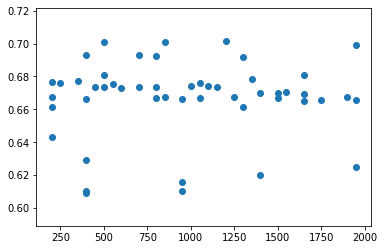

In [62]:
# qt_10 = results[results['param_max_features'] == 'log2']
# fg = sns.FacetGrid(data = qt_10, hue='param_min_samples_split', aspect=1.61, height=6)
# fg.map(plt.scatter, 'param_n_estimators', 'mean_test_score').add_legend(title='Min samples split')
# fg.set(xlabel='Inverse Regularisation Strength (C)', ylabel='Mean Score', title='Tuning the Logistic Regression Model (n_quantiles = 10)')

plt.scatter(results['param_n_estimators'], results['mean_test_score'])

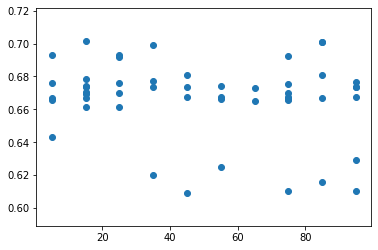

In [51]:
plt.scatter(top10['param_max_depth'], top10['mean_test_score'])

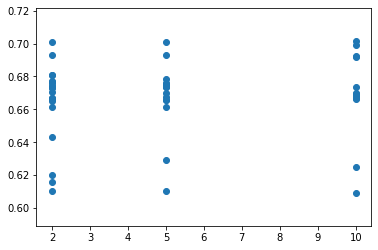

In [52]:
plt.scatter(top10['param_min_samples_split'], top10['mean_test_score'])

In [9]:
model = grid.best_estimator_
score = grid.best_score_
params = grid.best_params_

In [10]:
print(params)
print(score)

{'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 15, 'bootstrap': True}
0.7016666666666665


In [11]:
X = pd.read_hdf('../data/features/filtered/filtered_0.05_.h5')
y = pd.read_hdf('../data/ach_at_combined_y.h5', key='y')

s = 1
for i in range(1,6):
    X.loc[90*(i-1):90*i,'subject'] = s
    s += 1
for i in range(1,7):
    X.loc[450+(60*(i-1)):450+(60*i),'subject'] = s
    s+=1
assert not any(pd.isna(X['subject']))

train = X[X['subject'] != 4].index
test = X[X['subject'] == 4].index

X_train, X_test, y_train, y_test = X.iloc[train,:], X.iloc[test,:], y.iloc[train], y.iloc[test]

In [12]:
rf = RandomForestClassifier(**params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [38]:
from sklearn.metrics import roc_auc_score, confusion_matrix
y_t = y_test.astype('category')
y_t = pd.get_dummies(y_t)

# y_p = y_pred.astype('category')
y_p = pd.get_dummies(y_pred)

print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_t,y_p,multi_class='ovr'))

[[ 0 29  0]
 [ 0 28  2]
 [ 0 25  6]]
0.5244535519125684
